In [1]:
import pandas as pd
df = pd.read_csv('df_pos.csv',encoding='utf-8')
df.head()

,texts,label,pos
0,अमेरिकी और रूसी पुलिस के संयुक्त अभियान के फलस...,0,"['ADJ', 'CCONJ', 'ADJ', 'NOUN', 'ADP', 'ADJ', ..."
1,आज यहां रांची एक्सप्रेस के साथ बातचीत में वित्...,0,"['NOUN', 'PRON', 'PROPN', 'PROPN', 'ADP', 'ADP..."
2,हमे इन्तजार है ।,1,"['PRON', 'NOUN', 'AUX', 'PUNCT']"
3,जिस के नतीजे मे ये हुक्म सादिर किया गया है ।,1,"['PRON', 'ADP', 'NOUN', 'ADP', 'DET', 'NOUN', ..."
4,जयपुर,0,['PROPN']


In [27]:
import matplotlib.pyplot as plt
from collections import Counter

In [29]:
written = df[df['label'] == 0]
spoken = df[df['label'] == 1]

In [30]:
def process_group(group):
    # Combine all POS tags
    all_tags = [tag for tags in group['pos'] for tag in eval(tags)]
    # Count occurrences of each tag
    tag_counts = Counter(all_tags)
    # Calculate percentages
    total = sum(tag_counts.values())
    tag_percentages = {tag: count/total*100 for tag, count in tag_counts.items()}
    return tag_percentages

In [31]:
percentages_written = process_group(written)
percentages_spoken = process_group(spoken)

In [32]:
comparison_df = pd.DataFrame({
    'Written (%)': percentages_written,
    'Spoken (%)': percentages_spoken
}).fillna(0).sort_index()

comparison_df.head(20)

,Written (%),Spoken (%)
ADJ,7.069348,4.696345
ADP,21.561478,14.694166
ADV,0.913661,1.646845
AUX,5.987970,10.314775
CCONJ,1.825785,2.599762
DET,2.053213,3.832635
INTJ,0.000000,0.072969
NOUN,23.422387,18.241707
NUM,1.965622,2.153314
PART,2.100191,3.202838


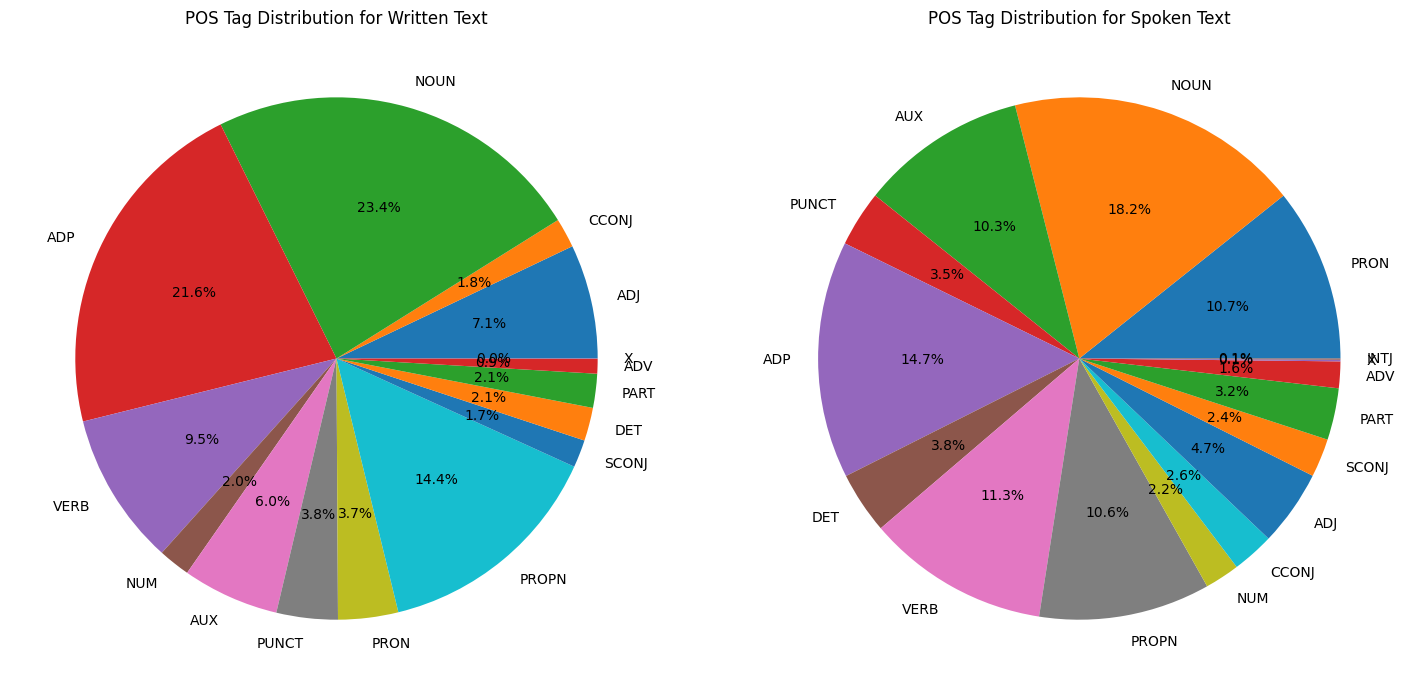

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

ax1.pie(percentages_0.values(), labels=percentages_0.keys(), autopct='%1.1f%%')
ax1.set_title('POS Tag Distribution for Written Text')

ax2.pie(percentages_1.values(), labels=percentages_1.keys(), autopct='%1.1f%%')
ax2.set_title('POS Tag Distribution for Spoken Text')

plt.tight_layout()
plt.show()

* ADJ - Adjective
Words that describe or modify nouns (e.g., big, red, happy)
* ADP - Adposition
Includes prepositions and postpositions (e.g., in, on, of, to)
* ADV - Adverb
Words that modify verbs, adjectives, or other adverbs (e.g., quickly, very, always)
* AUX - Auxiliary Verb
Helping verbs that support the main verb (e.g., is, have, will)
* CCONJ - Coordinating Conjunction
Words that connect words, phrases, or clauses (e.g., and, but, or)
* DET - Determiner
Words that introduce nouns and specify them (e.g., the, a, this, that)
* INTJ - Interjection
Exclamations or sudden expressions (e.g., oh!, wow!, ouch!)
* NOUN - Noun
Words that name persons, places, things, or ideas
* NUM - Numeral
Words expressing numbers (e.g., one, two, first, second)
* PART - Particle
Function words associated with another word or phrase (e.g., up in "look up")
* PRON - Pronoun
Words that substitute for nouns (e.g., he, she, it, they)
* PROPN - Proper Noun
Names of specific persons, places, or things (e.g., John, London, Google)
* PUNCT - Punctuation
Punctuation marks in the text
* SCONJ - Subordinating Conjunction
Words that introduce dependent clauses (e.g., because, although, if)
* VERB - Verb
Words that describe actions, states, or occurrences
* X - Other
Categories that don't fit into the above classifications, often used for foreign words or typos